In [1]:
import pandas as pd

df_yield = pd.read_csv("FAOSTAT_data.csv")
df_yield

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,4.303000e+02,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,t,2.449430e+05,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2002,2002,ha,5.470280e+05,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2002,2002,kg/ha,2.968000e+02,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN
5687,QCL,Crops and livestock products,356,India,5510,Production,111.0,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN
5688,QCL,Crops and livestock products,356,India,5312,Area harvested,111.0,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN
5689,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN


In [2]:
df_yield.shape

(5691, 15)

In [3]:
df_env = pd.read_csv("crop_recommendation.csv")
df_env




,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df_env.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
df_yield.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [6]:

df_yield["Crops"] = df_yield["Item"].str.split(",")


df_exploded = df_yield.explode("Crops")


df_exploded["Crops"] = df_exploded["Crops"].str.strip()

df_exploded.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Crops
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN,Anise
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN,badian
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN,coriander
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN,cumin
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,569271.0,A,Official figure,NaN,caraway


In [12]:
df_exploded["crop_clean"] = df_exploded["Crops"].str.lower().str.strip()


df_env["label_clean"] = df_env["label"].str.lower().str.strip()


merged_df = pd.merge(
    df_exploded,
    df_env,
    left_on="crop_clean",      
    right_on="label_clean",    
    how="inner"
)

merged_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,crop_clean,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee,coffee
1,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee,coffee
2,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee,coffee
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee,coffee
4,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee,coffee


In [15]:
merged_df.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,crop_clean,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
27595,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,rice,88,46,42,22.683191,83.463583,6.604993,194.265172,rice,rice
27596,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,rice,93,47,37,21.533463,82.140041,6.500343,295.924880,rice,rice
27597,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,rice,60,55,45,21.408658,83.329319,5.935745,287.576694,rice,rice
27598,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,rice,78,35,44,26.543481,84.673536,7.072656,183.622266,rice,rice
27599,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,rice,65,37,40,23.359054,83.595123,5.333323,188.413665,rice,rice


In [17]:
merged_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'Crops', 'crop_clean', 'N',
       'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'label_clean'],
      dtype='object')

In [22]:
merged_df.isnull().sum()


Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                27600
Crops                   0
crop_clean              0
N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
label                   0
label_clean             0
dtype: int64

In [24]:
merged_df.shape


(27600, 26)

In [26]:
merged_df.duplicated().sum()


0

In [28]:
numeric_columns = merged_df[["N","P","K","temperature","humidity","ph","rainfall","Value"]]


In [30]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(numeric_columns))


In [31]:
no_outliers = merged_df[(z < 3).all(axis=1)]


In [32]:
no_outliers.shape


(25817, 26)

In [33]:
no_outliers

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,crop_clean,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee,coffee
1,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee,coffee
2,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee,coffee
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee,coffee
4,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee,coffee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,88,46,42,22.683191,83.463583,6.604993,194.265172,rice,rice
27496,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,93,47,37,21.533463,82.140041,6.500343,295.924880,rice,rice
27497,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,60,55,45,21.408658,83.329319,5.935745,287.576694,rice,rice
27498,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,78,35,44,26.543481,84.673536,7.072656,183.622266,rice,rice


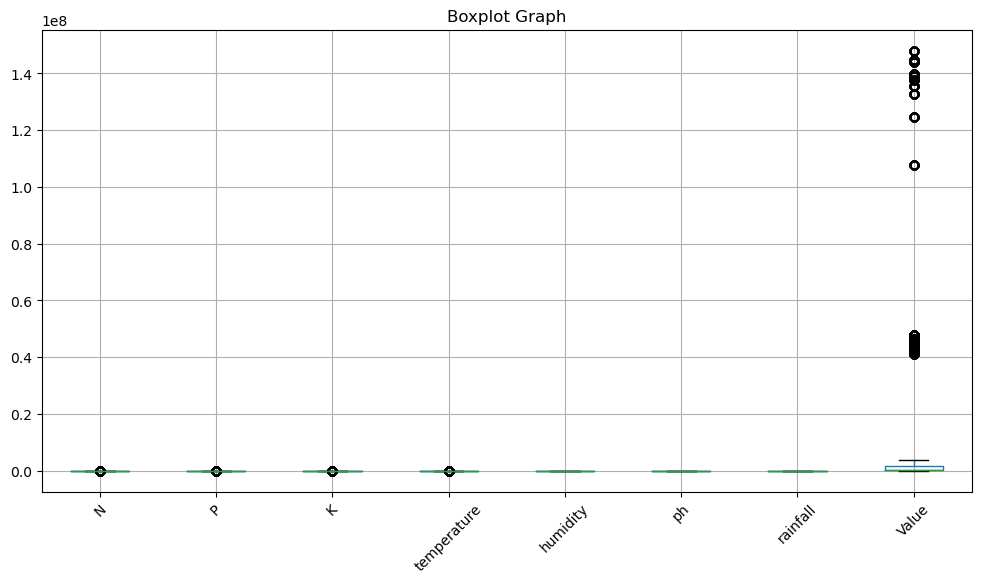

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
no_outliers[["N","P","K","temperature","humidity","ph","rainfall","Value"]].boxplot()
plt.title("Boxplot Graph")
plt.xticks(rotation=45)
plt.show()


In [43]:
Q1 = no_outliers["Value"].quantile(0.25)
Q3 = no_outliers["Value"].quantile(0.75)
IQR = Q3 - Q1

final_df = no_outliers[
    (no_outliers["Value"] >= Q1 - 1.5*IQR) &
    (no_outliers["Value"] <= Q3 + 1.5*IQR)
]

final_df.shape


(22517, 26)

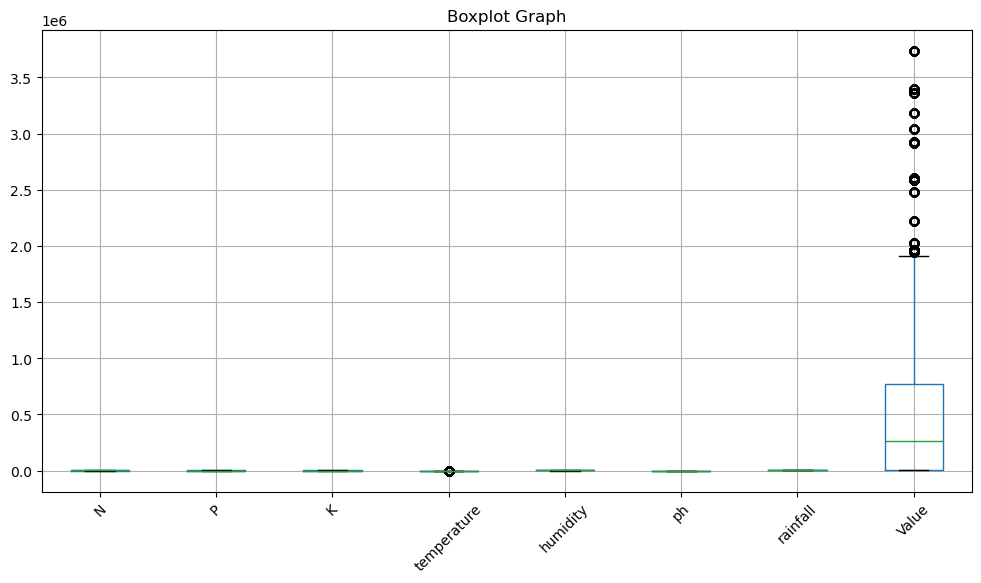

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
final_df[["N","P","K","temperature","humidity","ph","rainfall","Value"]].boxplot()
plt.title("Boxplot Graph")
plt.xticks(rotation=45)
plt.show()

In [47]:
final_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,crop_clean,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee,coffee
1,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee,coffee
2,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee,coffee
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee,coffee
4,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee,coffee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,88,46,42,22.683191,83.463583,6.604993,194.265172,rice,rice
27496,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,93,47,37,21.533463,82.140041,6.500343,295.924880,rice,rice
27497,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,60,55,45,21.408658,83.329319,5.935745,287.576694,rice,rice
27498,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,78,35,44,26.543481,84.673536,7.072656,183.622266,rice,rice


In [49]:
final_df = final_df.drop(columns=['Note'])


In [51]:
final_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,crop_clean,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee,coffee
1,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee,coffee
2,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee,coffee
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee,coffee
4,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2001,2001,...,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee,coffee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,88,46,42,22.683191,83.463583,6.604993,194.265172,rice,rice
27496,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,93,47,37,21.533463,82.140041,6.500343,295.924880,rice,rice
27497,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,60,55,45,21.408658,83.329319,5.935745,287.576694,rice,rice
27498,QCL,Crops and livestock products,356,India,5412,Yield,113.0,Rice,2023,2023,...,rice,78,35,44,26.543481,84.673536,7.072656,183.622266,rice,rice


In [55]:
final_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Crops', 'crop_clean', 'N', 'P',
       'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'label_clean'],
      dtype='object')